In [1]:
from collections import Counter
from sklearn.datasets.samples_generator import make_blobs, make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

In [2]:
def save_points(points, classes, file_path):
    with open(file_path, 'w') as outf:
        outf.write(u'{} {}\n'.format(len(points), len(points[0])))
        for p, c in zip(points, classes):
            outf.write(u'{},{}\n'.format(u','.join(map(str, p)), c))

# Generating data

### 1) Classification (blobs)

In [3]:
def generate_classification(**kwargs):
    # n_samples=10000, n_features=3, cluster_std=1.1, centers=centers
    points, classes = make_blobs(shuffle=True, random_state=42, **kwargs)
    return points, classes

In [19]:
points, classes = generate_classification(n_samples=1000, n_features=3, centers=[(1, 1, 1), (0, 0, 0)])
print points.shape, Counter(classes)

(1000, 3) Counter({0: 500, 1: 500})


In [20]:
def show_2d_points(points, classes):
    for cc in set(classes):
        pc = [p for p, c in zip(points, classes) if c == cc]
        plt.scatter(*zip(*pc))
    plt.show()

def show_3d_points(points, classes):
    fig = plt.figure()
    ax = Axes3D(fig)
    for cc in set(classes):
        pc = [p for p, c in zip(points, classes) if c == cc]
        x, y, z = zip(*pc)
        ax.scatter(x, y, z)
    plt.show()

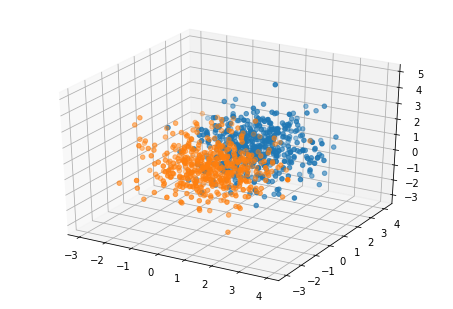

In [21]:
# show_2d_points(points, classes)
show_3d_points(points, classes)

In [22]:
save_points(points, classes, '/home/kolegor/classification.3d.small.not_linear_separable.txt')

### 2) Regression

In [25]:
def generate_regression(**kwargs):
    # n_samples=10000, n_features=3, cluster_std=1.1, centers=centers
    points, classes = make_regression(shuffle=True, random_state=42, **kwargs)
    return points, classes

In [183]:
# points, classes = generate_regression(n_samples=100, n_features=1, n_informative=1, noise=10)

In [40]:
def show_2d_regression(points, classes):
    plt.scatter(points, classes)
    plt.show()

In [181]:
# show_2d_regression(points, classes)

In [182]:
# save_points(points, classes, '/home/kolegor/regression.1d.small.not_straight_line.txt')

# Plot dataset with model line

In [24]:
def load_model_line(path):
    with open(path, 'r') as inf:
        return map(float, next(inf).strip().split(' '))

### 1) Plot regression

In [25]:
def load_regression_data(path):
    with open(path, 'r') as inf:
        count, features = map(int, next(inf).strip().split(' '))
        x, y, c = [], [], []
        for line in inf:
            tokens = map(float, line.strip().split(','))
            x.append(tokens[0])
            y.append(tokens[1])
            c.append(1)
        return x, y, c

In [29]:
def plot_regression(data, line, norm_line=False):
    X, Y, classes = data
    plt.scatter(X, Y)

    k, b = line
    _x = np.linspace(-1000, 1000, 10)
    _y = k * _x + b
    plt.plot(_x, _y, c='r')
    
    # MSE
    mse = 0.0
    for x, y in zip(X, Y):
        pred = k * x + b
        mse += (pred - y) ** 2
    print mse
    
    plt.ylim([min(Y) - 10, max(Y) + 10])
    plt.xlim([min(X) - 10, max(X) + 10])

In [31]:
# dataset_name = 'regression.1d.small.straight_line.txt'
# data = load_regression_data("/home/kolegor/Study/Master/Chapter_4/Big_data_ML/mo_linear_models/test/datasets/" + dataset_name)
# line = load_model_line("/home/kolegor/Study/Master/Chapter_4/Big_data_ML/mo_linear_models/test/model.out")
# plot_regression(data, line)

### 2) Plot classification

In [20]:
def load_classification_data(path):
    with open(path, 'r') as inf:
        count, features = map(int, next(inf).strip().split(' '))
        x, y, c = [], [], []
        for line in inf:
            tokens = map(float, line.strip().split(','))
            x.append(tokens[0])
            y.append(tokens[1])
            c.append(tokens[2])
        return x, y, c

def plot_classification_data(data, line):
    x, y, classes = data
    for cc in set(classes):
        pc = [(_x, _y) for _x, _y, _c in zip(x, y, classes) if _c == cc]
        plt.scatter(*zip(*pc))
    
    # w1 * x + w2 * y + w3 = 0
    # y = - (w1 * x + w3) / w2 = -(w1/w2)x - w3/w2
    k = (line[0] / line[1])
    b = -(line[2] / line[1])

    _x = np.linspace(-1000, 1000, 10)
    _y = k * _x + b
    plt.plot(_x, _y)
    
    plt.ylim([min(y) - 10, max(y) + 10])
    plt.xlim([min(x) - 10, max(x) + 10])

In [23]:
# dataset_name = 'classification.2d.small.not_linear_separable.txt'
# data = load_classification_data("/home/kolegor/Study/Master/Chapter_4/Big_data_ML/mo_linear_models/test/datasets/" + dataset_name)
# line = load_model_line("/home/kolegor/Study/Master/Chapter_4/Big_data_ML/mo_linear_models/test/model.out")
# plot_classification_data(data, line)